In [5]:
!pip install qiskit
!pip install -q qiskit qiskit-aer pylatexenc --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.2 MB/s eta 0:00:00


{'11': 1024}


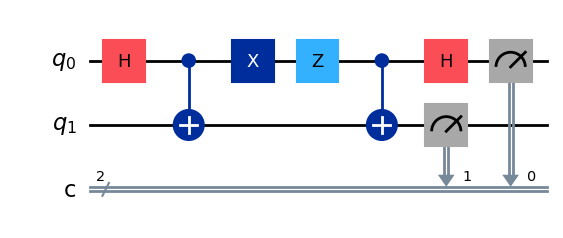

In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

qc = QuantumCircuit(2, 2)
# Create Bell pair
qc.h(0)
qc.cx(0, 1)
# Encode message (say, "11")
qc.x(0)
qc.z(0)
# Decode
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=1024).result()
print(result.get_counts())
qc.draw('mpl')

Message sent: 00 → Message received: 00


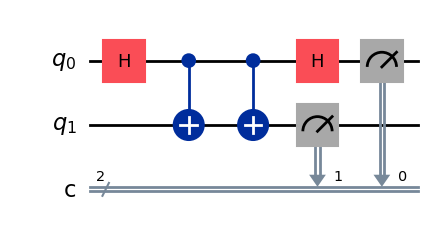

Message sent: 01 → Message received: 10


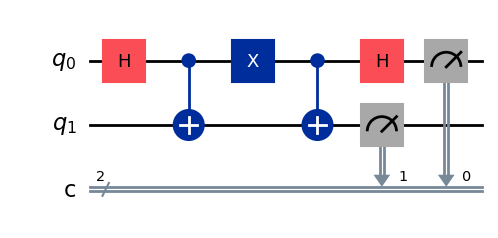

Message sent: 10 → Message received: 01


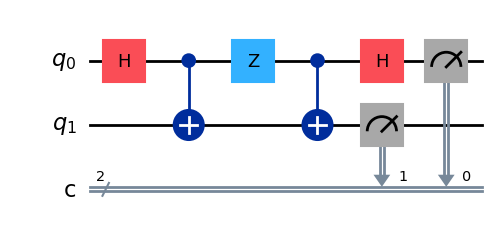

Message sent: 11 → Message received: 11


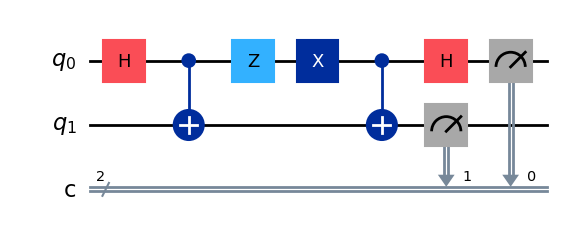

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

def superdense_coding(message):
    qc = QuantumCircuit(2, 2)
    # Step 1: Create Bell pair
    qc.h(0)
    qc.cx(0, 1)

    # Step 2: Encode based on message
    if message == "00":
        pass
    elif message == "01":
        qc.x(0)
    elif message == "10":
        qc.z(0)
    elif message == "11":
        qc.z(0)
        qc.x(0)

    # Step 3: Decode
    qc.cx(0, 1)
    qc.h(0)

    # Step 4: Measure
    qc.measure([0, 1], [0, 1])

    # Run simulation
    backend = Aer.get_backend('qasm_simulator')
    result = backend.run(qc, shots=1024).result()
    counts = result.get_counts()
    print(f"Message sent: {message} → Message received: {list(counts.keys())[0]}")
    return qc, counts

for msg in ["00", "01", "10", "11"]:
    circuit, result = superdense_coding(msg)
    display(circuit.draw('mpl'))

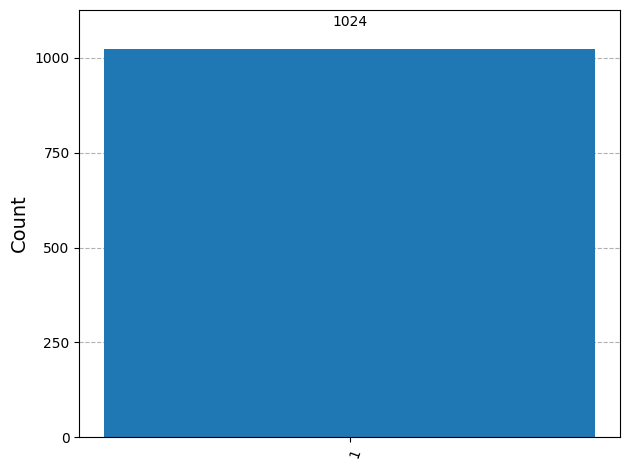

In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())